<a href="https://colab.research.google.com/github/ImaneHoum/ML-network/blob/main/code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import missingno as msno
from pandas.plotting import scatter_matrix


In [24]:

df1 = pd.read_csv('dataset/Xtrain.csv')
df2 = pd.read_csv('dataset/Ytrain.csv')
#df2.iloc[:, 1].head(n=11)
df = pd.concat([df1, df2.iloc[:, 1]], axis=1)
df.head(n=11)

,date,train,way,station,hour,composition,p1q0,p2q0,p3q0,p0q1,p0q2,p0q3,p0q0
0,2019-01-07,1,0,AD,06:00:00,2,NaN,NaN,NaN,0.201,0.138,0.091,0.216
1,2019-01-08,1,0,AD,06:00:00,2,NaN,NaN,NaN,0.204,0.152,0.106,0.216
2,2019-01-10,1,0,AD,06:00:00,2,NaN,NaN,NaN,0.213,0.153,0.111,0.227
3,2019-01-11,1,0,AD,06:00:00,2,NaN,NaN,NaN,0.213,0.152,0.108,0.229
4,2019-01-14,1,0,AD,06:00:00,2,NaN,NaN,NaN,0.210,0.147,0.096,0.225
5,2019-01-15,1,0,AD,06:00:00,2,NaN,NaN,NaN,0.218,0.154,0.106,0.238
6,2019-01-17,1,0,AD,06:00:00,2,NaN,NaN,NaN,0.209,0.140,0.094,0.228
7,2019-01-18,1,0,AD,06:00:00,2,NaN,NaN,NaN,0.207,0.141,0.104,0.217
8,2019-01-21,1,0,AD,06:00:00,2,NaN,NaN,NaN,0.234,0.149,0.111,0.258
9,2019-01-22,1,0,AD,06:00:00,2,NaN,NaN,NaN,0.223,0.151,0.102,0.242


In [43]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31119 entries, 0 to 31118
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         31119 non-null  object 
 1   train        31119 non-null  int64  
 2   way          31119 non-null  int64  
 3   station      31119 non-null  object 
 4   hour         27915 non-null  object 
 5   composition  31119 non-null  int64  
 6   p1q0         29067 non-null  float64
 7   p2q0         26974 non-null  float64
 8   p3q0         24935 non-null  float64
 9   p0q1         27917 non-null  float64
 10  p0q2         24720 non-null  float64
 11  p0q3         21527 non-null  float64
 12  p0q0         31119 non-null  float64
dtypes: float64(7), int64(3), object(3)
memory usage: 3.1+ MB


In [25]:
df.columns[df.isnull().any()].tolist()

['hour', 'p1q0', 'p2q0', 'p3q0', 'p0q1', 'p0q2', 'p0q3']

[]

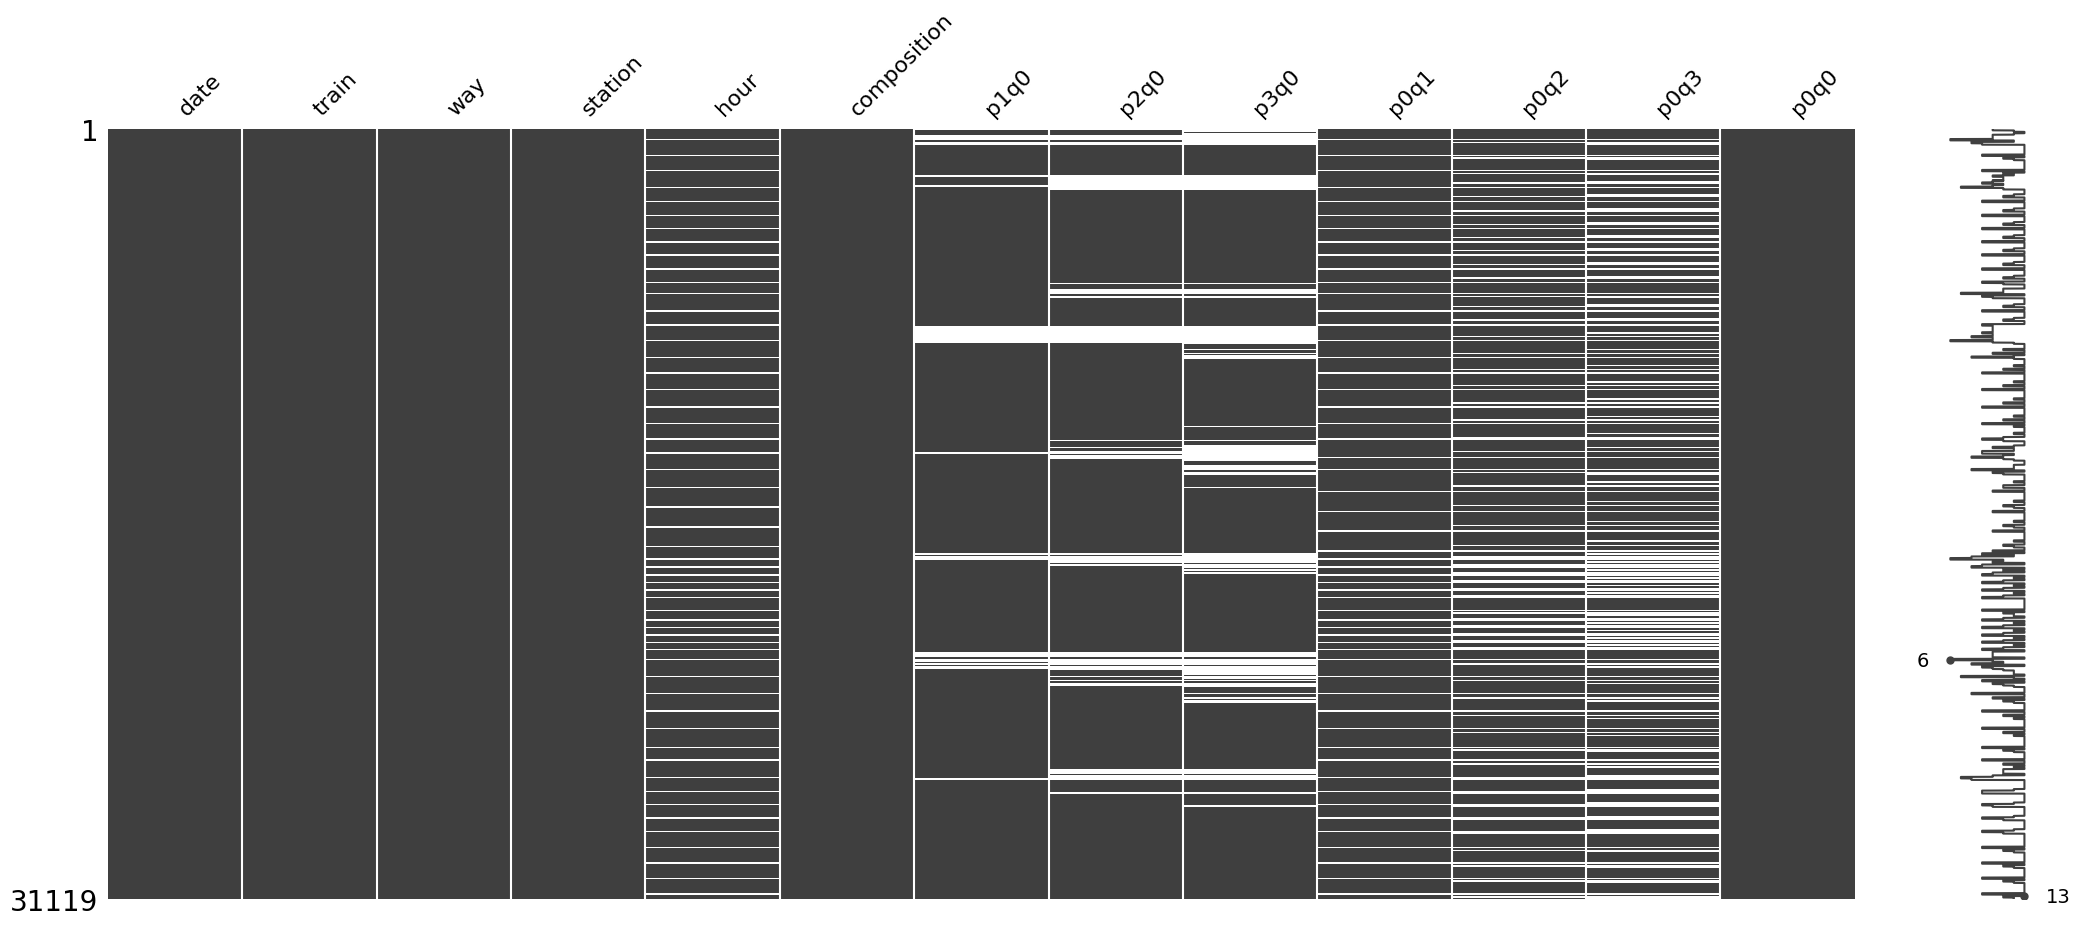

In [31]:
msno.matrix(df)



(17666, 13)

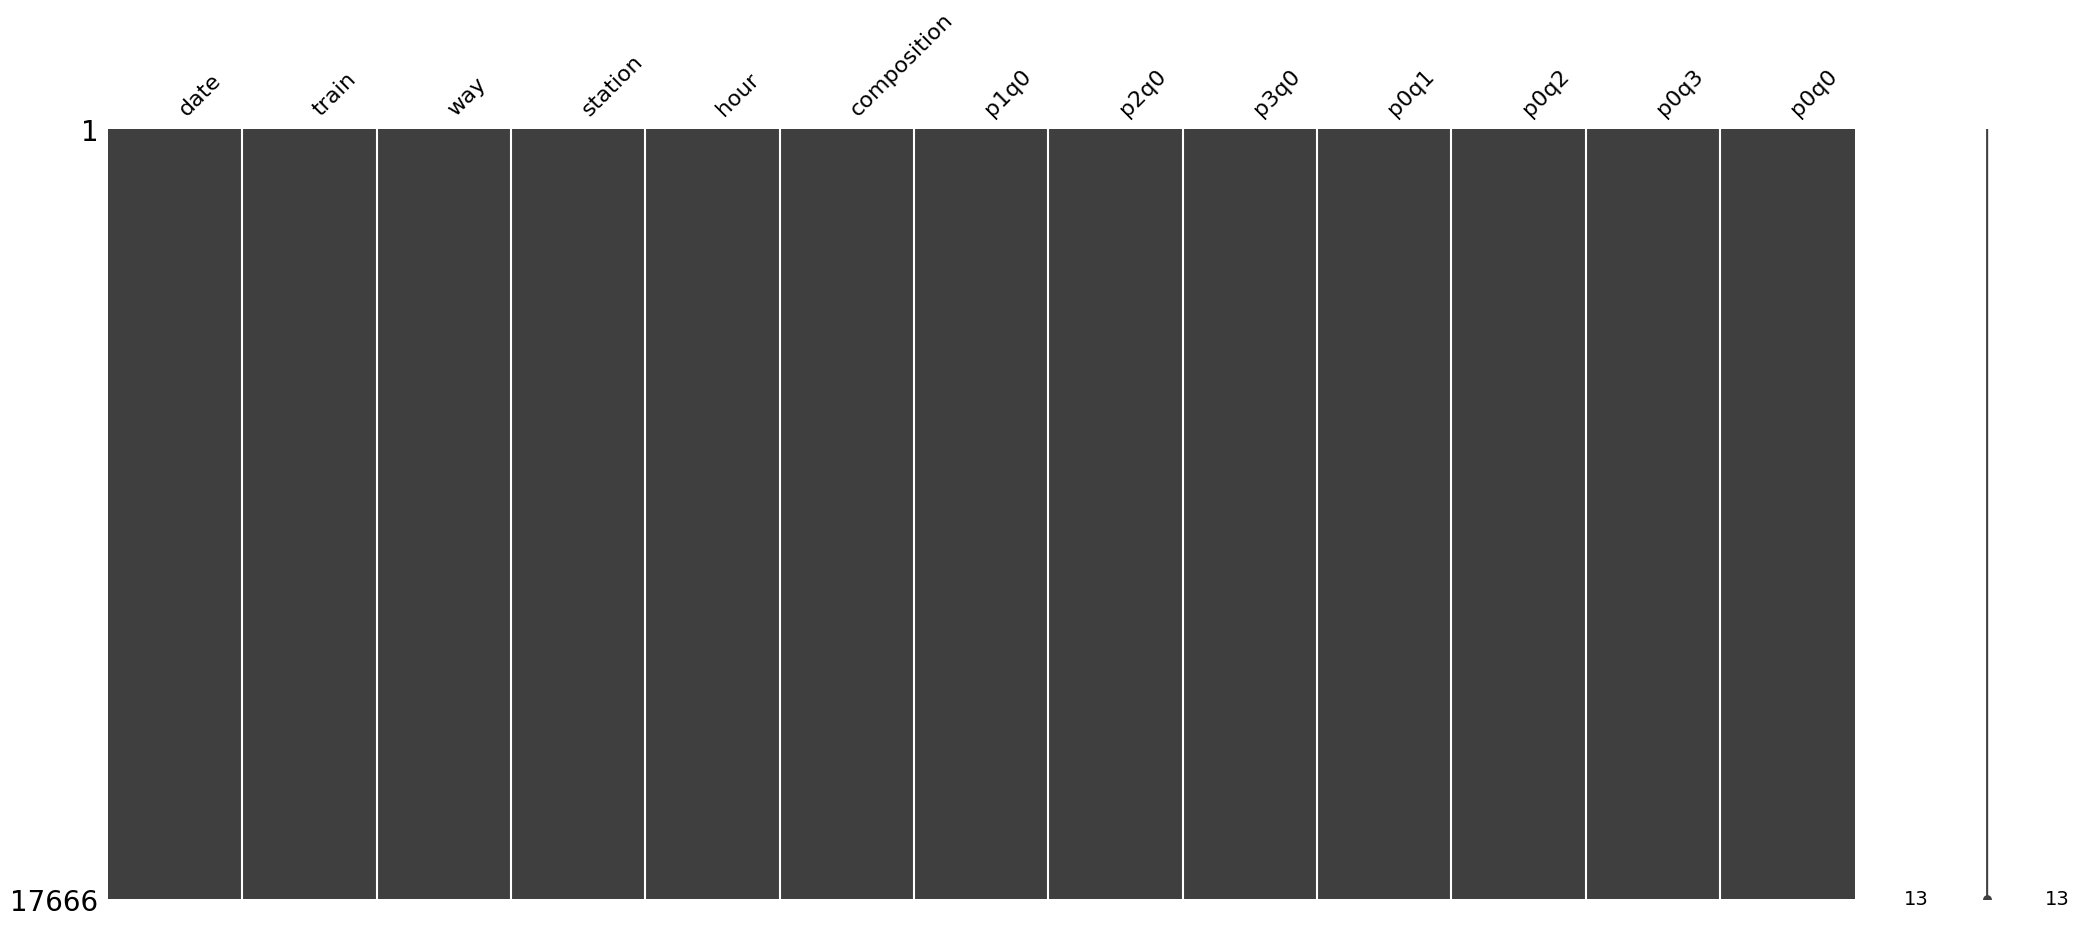

In [37]:
#we can try removing the missing values and see if it affects the results
df_nonull = df.dropna()
df_nonull.columns[df_nonull.isnull().any()].tolist()
msno.matrix(df_nonull)
df_nonull.shape

In [ ]:
# OR we replace the missing value with another value (kinda tamper the database)

In [44]:
#  maybe think about how to deal with non numerical data particularly in the column hour

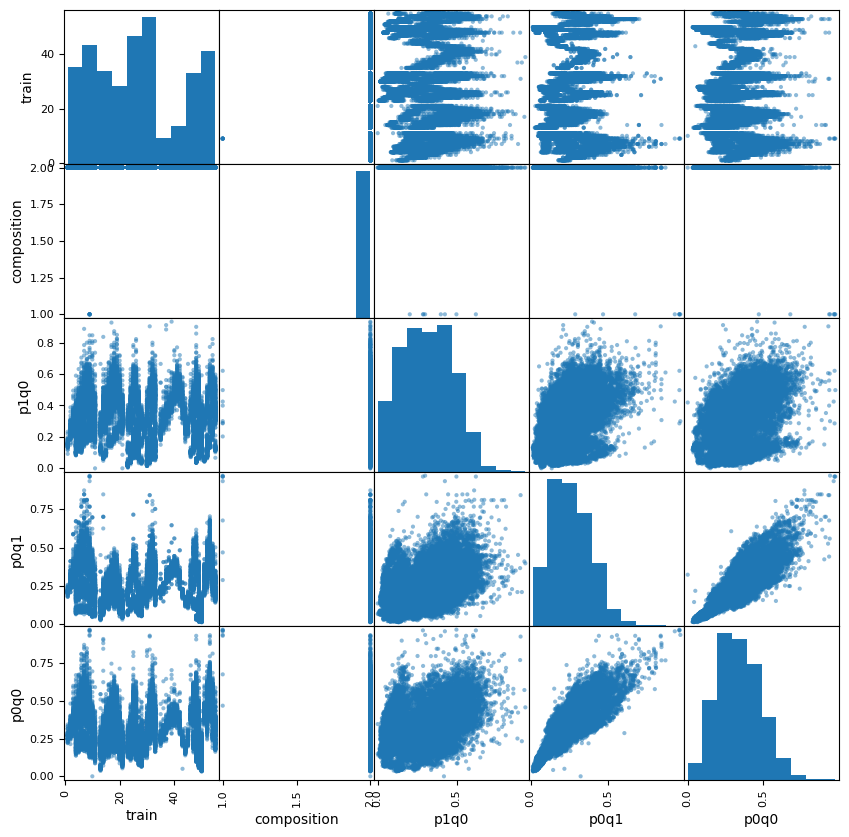

In [38]:
columns_to_plot = ['train','composition',
                        'p1q0',
                        'p0q1','p0q0','hour',
                        ]
sm = scatter_matrix(df_nonull[columns_to_plot],
                   figsize=(10,10))

plt.show()

<Axes: title={'center': 'p1q0'}, xlabel='train'>

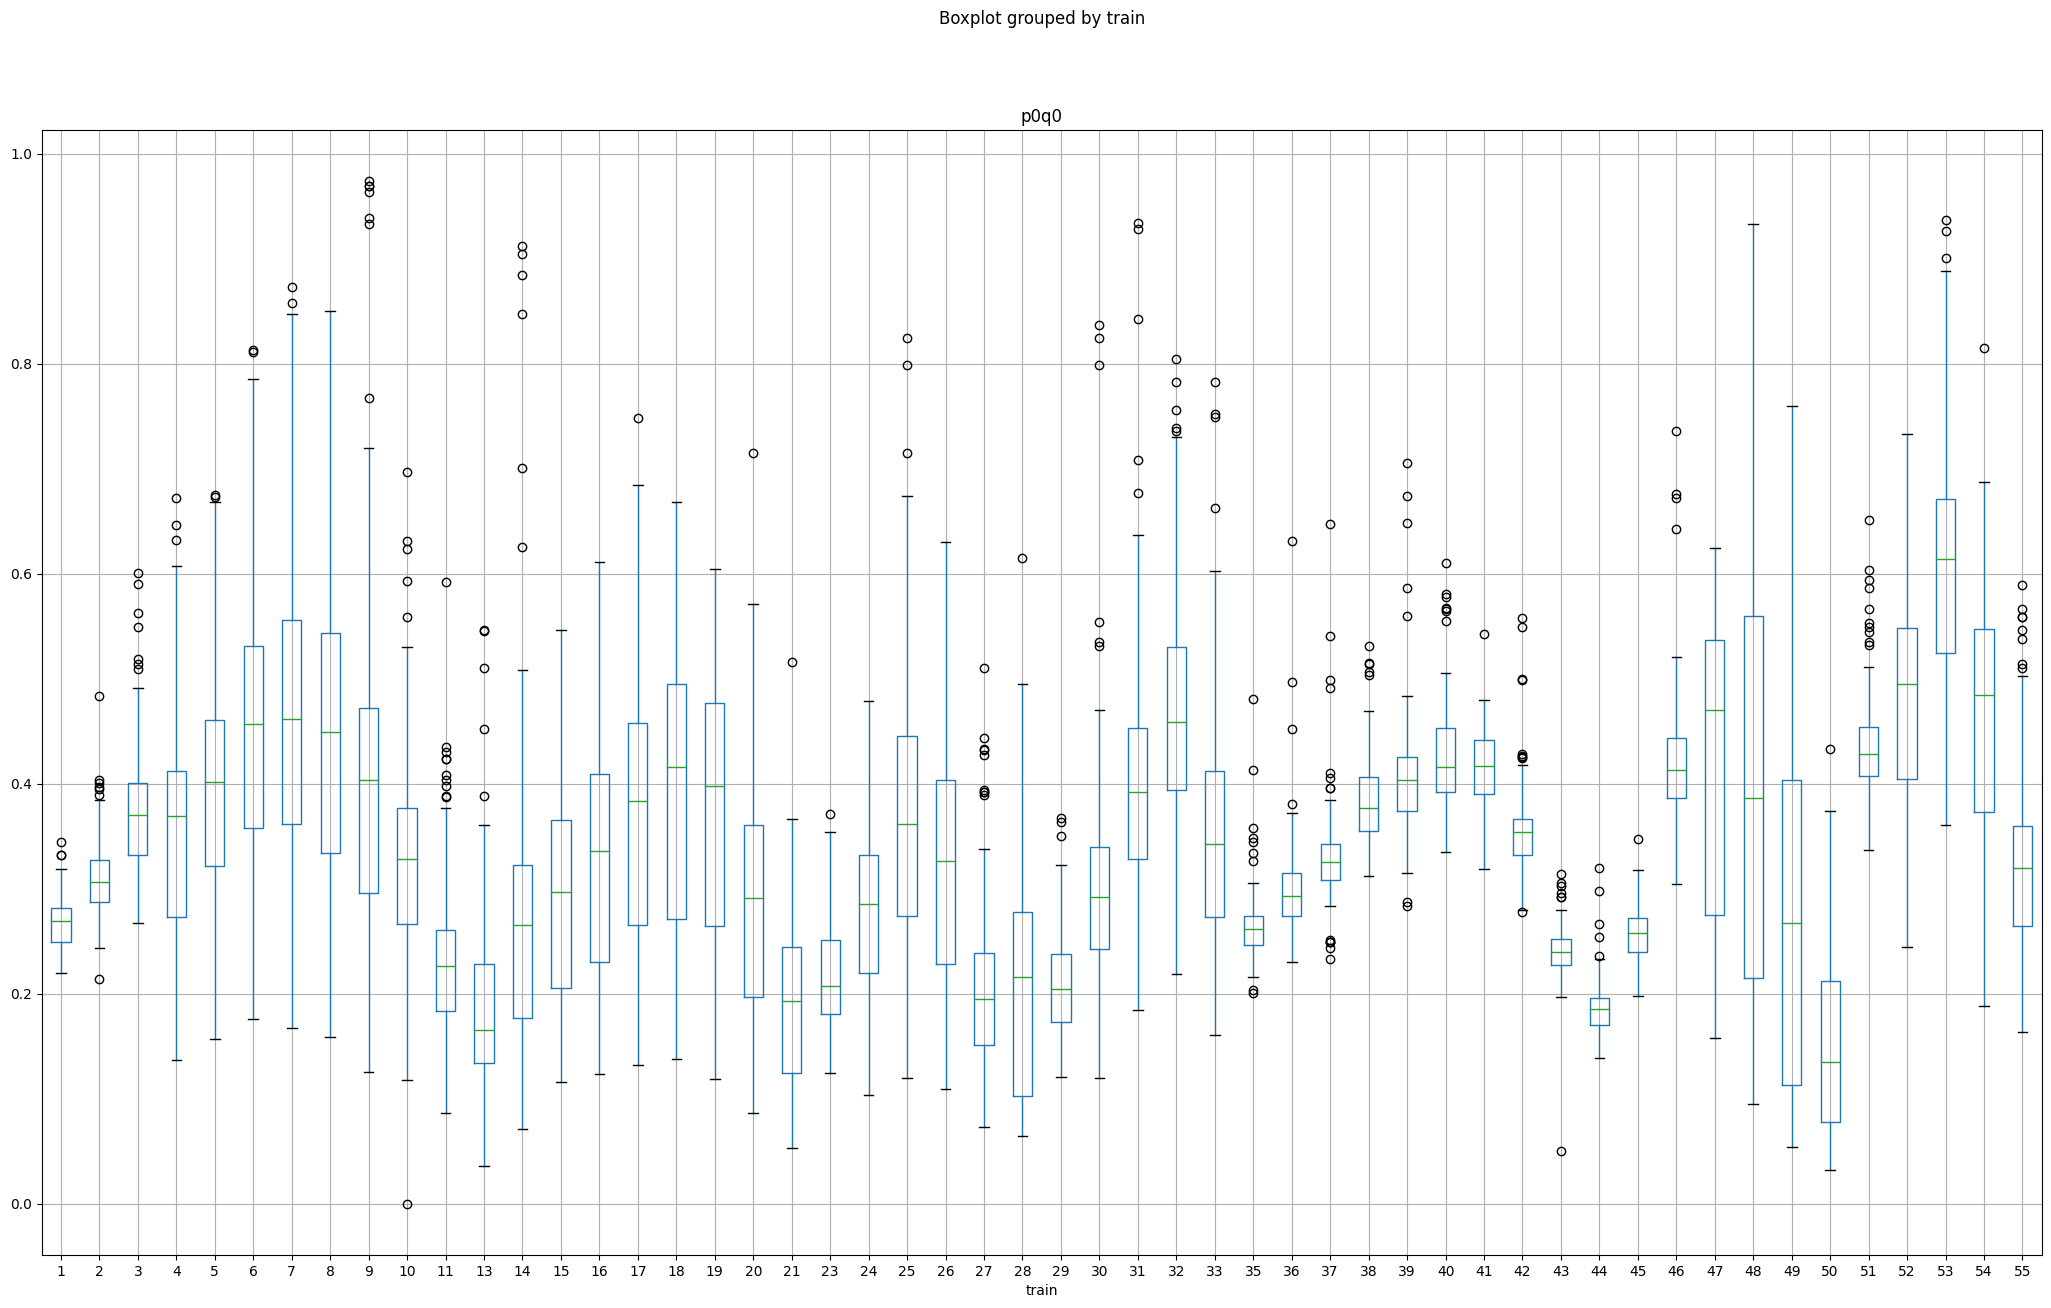

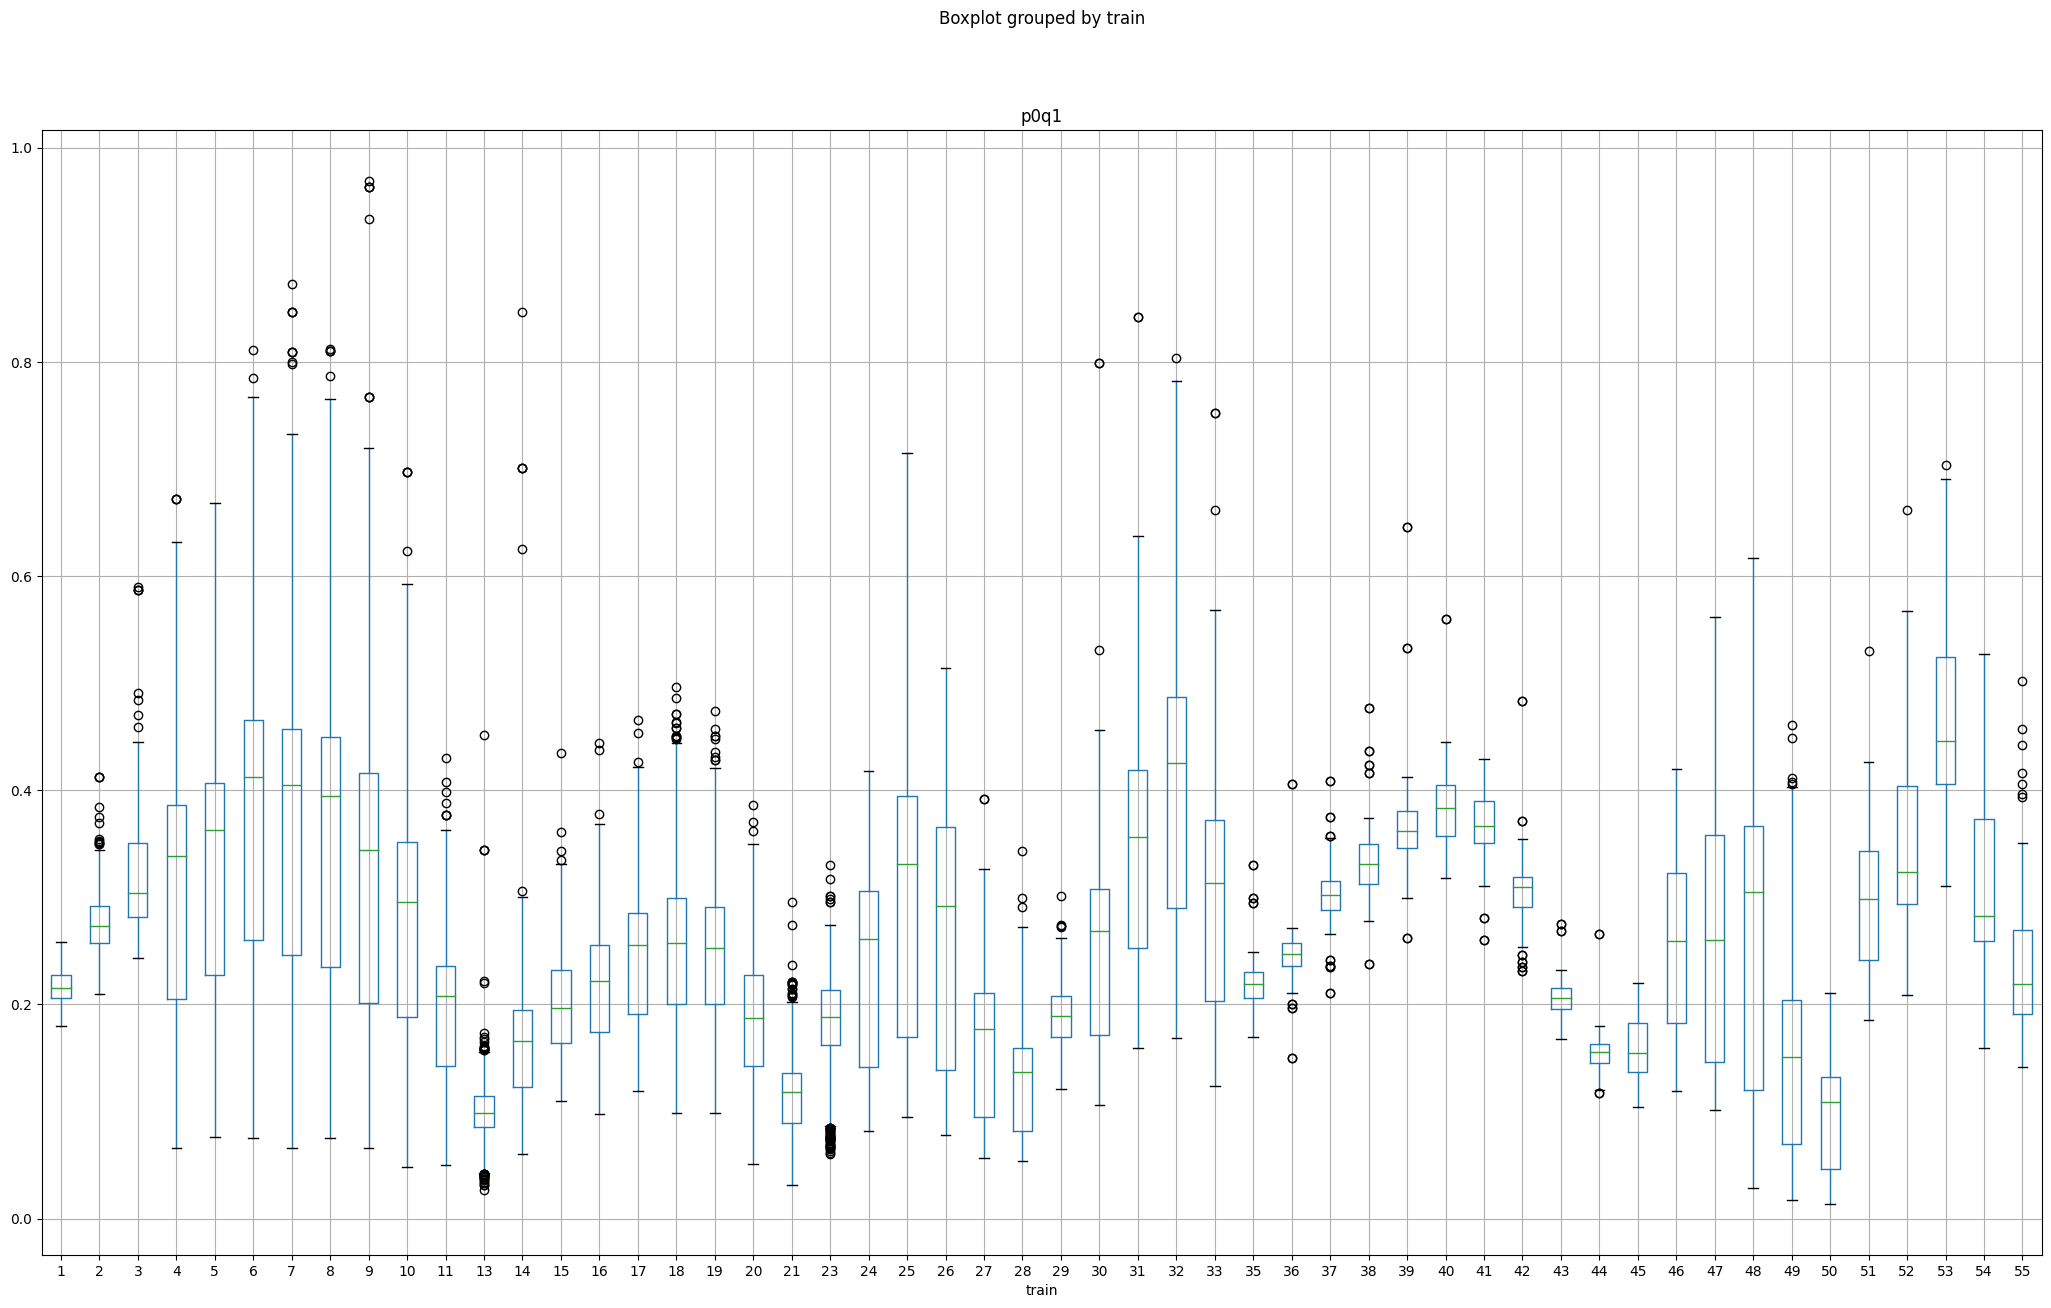

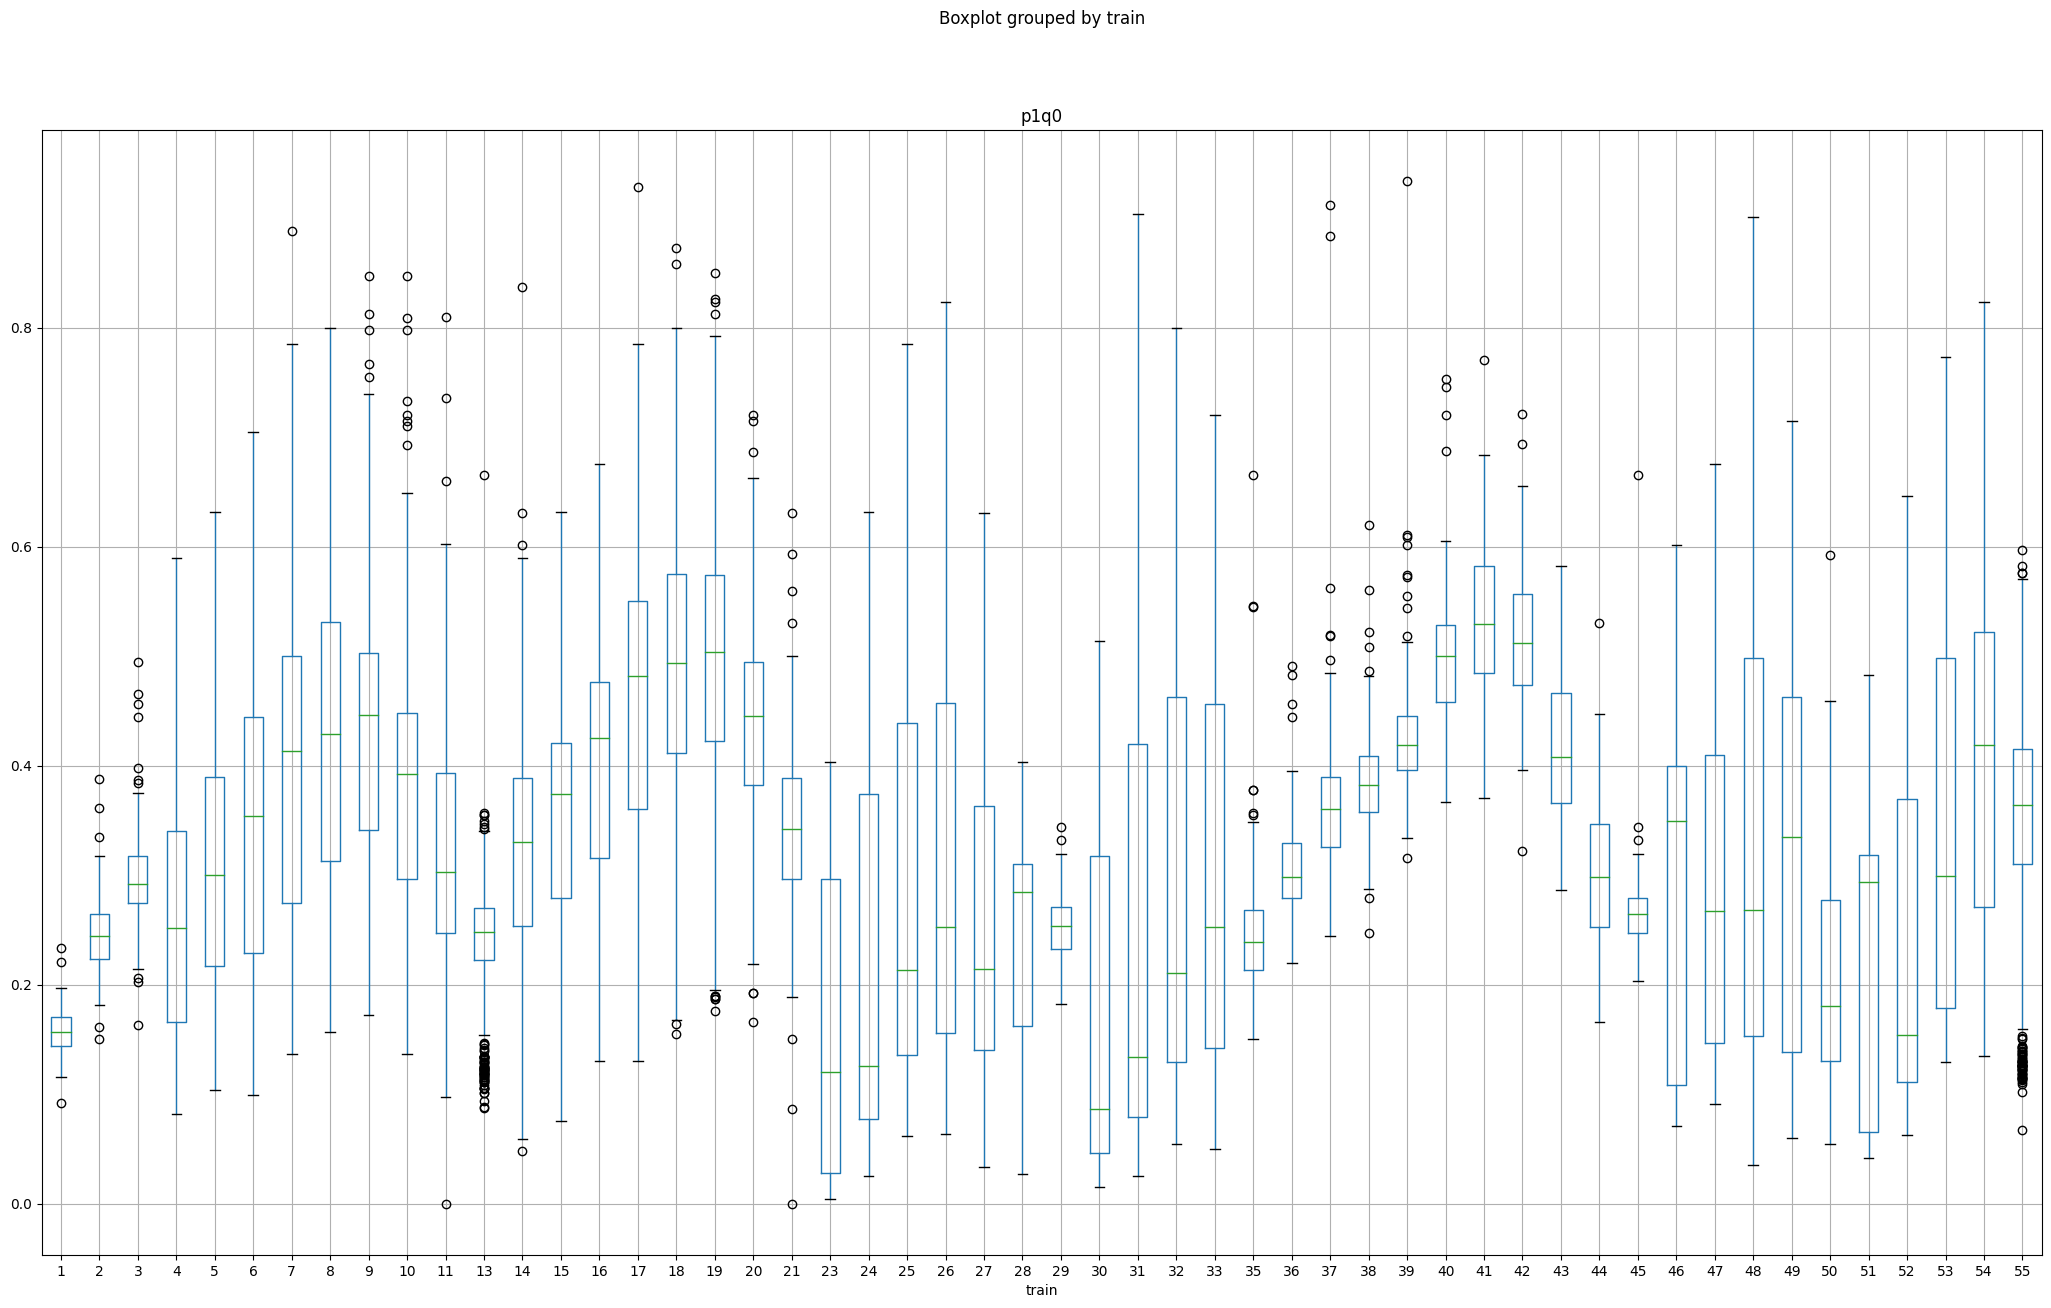

In [39]:
df_nonull.boxplot(column=['p0q0'], by="train", figsize=(25,15))
df_nonull.boxplot(column=['p0q1'], by="train", figsize=(25,15))
df_nonull.boxplot(column=['p1q0'], by="train", figsize=(25,15))

In [45]:
columns_to_plot = ['train','composition',
                        'p1q0',
                        'p0q1','p0q0'
                        ]
corrmatrix = df_nonull[columns_to_plot].corr()
corrmatrix

,train,composition,p1q0,p0q1,p0q0
train,1.000000,0.023964,-0.090282,-0.039710,0.058909
composition,0.023964,1.000000,-0.008425,-0.085371,-0.078836
p1q0,-0.090282,-0.008425,1.000000,0.466090,0.462846
p0q1,-0.039710,-0.085371,0.466090,1.000000,0.876912
p0q0,0.058909,-0.078836,0.462846,0.876912,1.000000
